# Data exploration

This section analyses the results of the dataset that was created by shortlisting the downloaded papers, thanks to the search filter

In [1]:
#importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import spacy
import numpy as np
import warnings
import json
warnings.filterwarnings('ignore')

In [2]:
#Loading the final dataset and the one regarding the publication year of all the downloaded papers
df = pd.read_csv('Dataset_API/papers_shortlisted_final2.csv', index_col=0)
years_allpapers = pd.read_csv('Dataset_API/all_papers_year.csv', index_col=0)

In [3]:
years_allpapers

,year
0,2010
1,2017
2,2016
3,2007
4,2015
...,...
212759140,1974
212759141,2016
212759142,1989
212759143,2006


In [4]:
df

,corpusid,externalids,url,title,authors,venue,publicationvenueid,year,referencecount,citationcount,influentialcitationcount,isopenaccess,s2fieldsofstudy,publicationtypes,publicationdate,journal,updated,abstract
0,210843200,"{'ACL': None, 'DBLP': 'journals/remotesensing/...",https://www.semanticscholar.org/paper/381b8081...,Analyzing Space-Time Coherence in Precipitatio...,"[{'authorId': '3141133', 'name': 'M. Lanfredi'...",Remote Sensing,8e1bd4b5-d5b2-4e22-ba0a-01fe5568d472,2020.0,45,9,0,True,"[{'category': 'Environmental Science', 'source...",['JournalArticle'],2020-01-03,"{'name': 'Remote. Sens.', 'pages': '171', 'vol...",2023-05-06T15:26:40.142Z,Seasonality is a fundamental feature of enviro...
1,154931899,"{'ACL': None, 'DBLP': None, 'ArXiv': None, 'MA...",https://www.semanticscholar.org/paper/d4d1370e...,"Trends in sub-hourly, sub-daily and daily extr...","[{'authorId': '104995180', 'name': 'Orpita U. ...",NaN,NaN,2014.0,42,20,0,False,"[{'category': 'Environmental Science', 'source...",NaN,2014-12-01,{'name': 'Journal of Water and Climate Change'...,2023-05-05T01:44:46.447Z,Intensity and frequency of extreme rainfall ar...
2,256336442,"{'ACL': None, 'DBLP': None, 'ArXiv': None, 'MA...",https://www.semanticscholar.org/paper/e4c7c633...,Development of a data-verified ionospheric mod...,"[{'authorId': '2116929839', 'name': 'Jeongheon...",Journal of the Korean Physical Society,79534c98-709c-43db-be0d-8e03561d8d63,2016.0,15,0,0,False,NaN,NaN,2016-06-01,{'name': 'Journal of the Korean Physical Socie...,2023-01-29T17:14:40.281Z,"As a base model for space weather application,..."
3,131121356,"{'ACL': None, 'DBLP': None, 'ArXiv': None, 'MA...",https://www.semanticscholar.org/paper/a8932c17...,"Modelling Runoff on a Small Lowland Catchment,...","[{'authorId': '108342409', 'name': 'Tamás Práv...",NaN,NaN,2015.0,30,6,0,True,"[{'category': 'Environmental Science', 'source...",NaN,2015-07-01,"{'name': 'Journal of Environmental Geography',...",2023-06-02T01:12:09.612Z,Abstract The lowland region of the South-Easte...
4,127251655,"{'ACL': None, 'DBLP': None, 'ArXiv': None, 'MA...",https://www.semanticscholar.org/paper/8c51c26d...,Floating with seeds: understanding hydrochorou...,"[{'authorId': '7203483', 'name': 'T. V. D. Sto...",NaN,NaN,2012.0,1,0,0,False,"[{'category': 'Environmental Science', 'source...",NaN,NaN,"{'name': '', 'pages': '92', 'volume': '55'}",2022-02-09T15:59:11.856Z,This project aims to map focal areas of natura...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72350,59961611,"{'ACL': None, 'DBLP': None, 'ArXiv': None, 'MA...",https://www.semanticscholar.org/paper/e0d226bb...,Human Paleoecology in the Levantine Corridor,"[{'authorId': '103631716', 'name': 'P. Willoug...",NaN,NaN,2006.0,2,17,1,True,"[{'category': 'Environmental Science', 'source...",['Review'],NaN,"{'name': '', 'pages': None, 'volume': ''}",2023-02-19T18:21:23.073Z,T volume represents the proceedings of a 2002 ...
72351,23260559,"{'ACL': None, 'DBLP': None, 'ArXiv': None, 'MA...",https://www.semanticscholar.org/paper/ae01bea1...,Epidemiology of Childhood Type 1 Diabetes Mell...,"[{'authorId': '2122945', 'name': 'O. Cinek', '...",Hormone Research in Paediatrics,6b515834-8065-438e-8a99-175de02e242a,2011.0,26,23,3,False,"[{'category': 'Medicine', 'source': 's2-fos-mo...",['JournalArticle'],2011-07-01,"{'name': 'Hormone Research in Paediatrics', 'p...",2023-04-18T13:44:41.197Z,"Background: Over the past 15 years, the incide..."
72352,212478679,"{'ACL': None, 'DBLP': None, 'ArXiv': None, 'MA...",https://www.semanticscholar.org/paper/d8cc4a0d...,Study Of PV Modules In Grid Connected Distribu...,"[{'authorId': '2060393979', 'name': 'Dalia Deb...",NaN,NaN,2019.0,18,0,0,False,NaN,NaN,NaN,NaN,2022-02-08T02:59:00.832Z,"Now a days, photovoltaic (PV) system finds ext..."
72353,134740898,"{'ACL': None, 'DBLP': None, 'ArXiv': None, 'MA...",https://www.semanticscholar.org/paper/e1973761...,Development of an Italian catalogue of potenti...,"

In [5]:
print("Number of papers:",len(df))

Number of papers: 72355


Papers dated from 1812 to 2023 passed the filter, although, for the one paper from 1812, this is a classification error, as this paper is a review of a book probably from 1812, a review that is certainly more recent, as a work from 1890 and molecular biology is cited. 

In [6]:
print('Year range:', int(min(df['year'])), '-', int(max(df['year'])))

Year range: 1812 - 2023


The dataset has several fields with missimg values. As yet, no entries are dropped and no missing values replaced. Later in the analysis, it will be decided what to do with the missing values.

In [7]:
df.isna().sum()

corpusid                        0
externalids                     0
url                             0
title                           0
authors                         0
venue                       46024
publicationvenueid          49017
year                          622
referencecount                  0
citationcount                   0
influentialcitationcount        0
isopenaccess                    0
s2fieldsofstudy             15542
publicationtypes            48616
publicationdate             22918
journal                      9789
updated                         0
abstract                        0
dtype: int64

In [8]:
df.columns

Index(['corpusid', 'externalids', 'url', 'title', 'authors', 'venue',
       'publicationvenueid', 'year', 'referencecount', 'citationcount',
       'influentialcitationcount', 'isopenaccess', 's2fieldsofstudy',
       'publicationtypes', 'publicationdate', 'journal', 'updated',
       'abstract'],
      dtype='object')

### Unique nuber of authors in the dataset

In [9]:
unique_authorId = {}
for i in tqdm(df['authors']):
    authors = eval(i)
    for author in authors:
        unique_authorId[author['authorId']] = None

print("The number of unique author ids present in the dataset is:", len(unique_authorId))

100%|██████████| 72355/72355 [00:17<00:00, 4071.64it/s]

The number of unique author ids present in the dataset is: 196053


In [10]:
print("Average number of authors per paper:", round(len(unique_authorId)/len(df),3))

Average number of authors per paper: 2.71


In [11]:
# Creating a datset to merge information regardig the years of publication for all the papers and those regarding the subgroup of the filtered papers
keys_all_years, counts_all_years = np.unique(years_allpapers[(years_allpapers['year']>=1900) & (years_allpapers['year']<2023)], return_counts=True)
df_all_years = pd.DataFrame({'year':keys_all_years,'counts_all_year':counts_all_years})
keys_research, counts_research = np.unique(df[(df['year']>=1900) & (df['year']<2023)]['year'], return_counts=True)
df_research = pd.DataFrame({'year':keys_research,'counts_research':counts_research})
df_research = df_research.astype(int)
df_plot_year = pd.merge(df_all_years,df_research,how='outer',on='year')
df_plot_year['counts_research'] = df_plot_year['counts_research'].fillna(0) 
df_plot_year = df_plot_year.astype(int)
df_plot_year

,year,counts_all_year,counts_research
0,1900,20828,3
1,1901,21679,1
2,1902,22832,2
3,1903,23052,4
4,1904,23732,1
...,...,...,...
118,2018,8401420,4348
119,2019,8515688,4549
120,2020,8570602,5637
121,2021,7134116,5773


In [12]:
#define a function do plot nicely xticks and yticks labels
def format_string(x, pos):
    tick_str = ""
    x = str(int(x))
    count = 1
    for i in range(len(x), -1, -1):
        if count % 3 == 0 and len(x) > 3 and (i-1) != 0 and (i-1) != -1:
            tick_str = "," + x[i-1] + tick_str
        elif (i-1) != -1:
            tick_str = x[i-1] + tick_str
        count = count + 1

    return tick_str

### Comparison between the year of publication of the papers resulting from the search, and the year of publication of all downloaded papers. 

To investigate whether the spike in recent years is due to the topic being researched, or whether there are simply more papers in the dataset relating to the latest years

Text(0.0117, 0.75, 'Total number of papers: 207,506,981\nTotal number of filtered papers: 69,653')

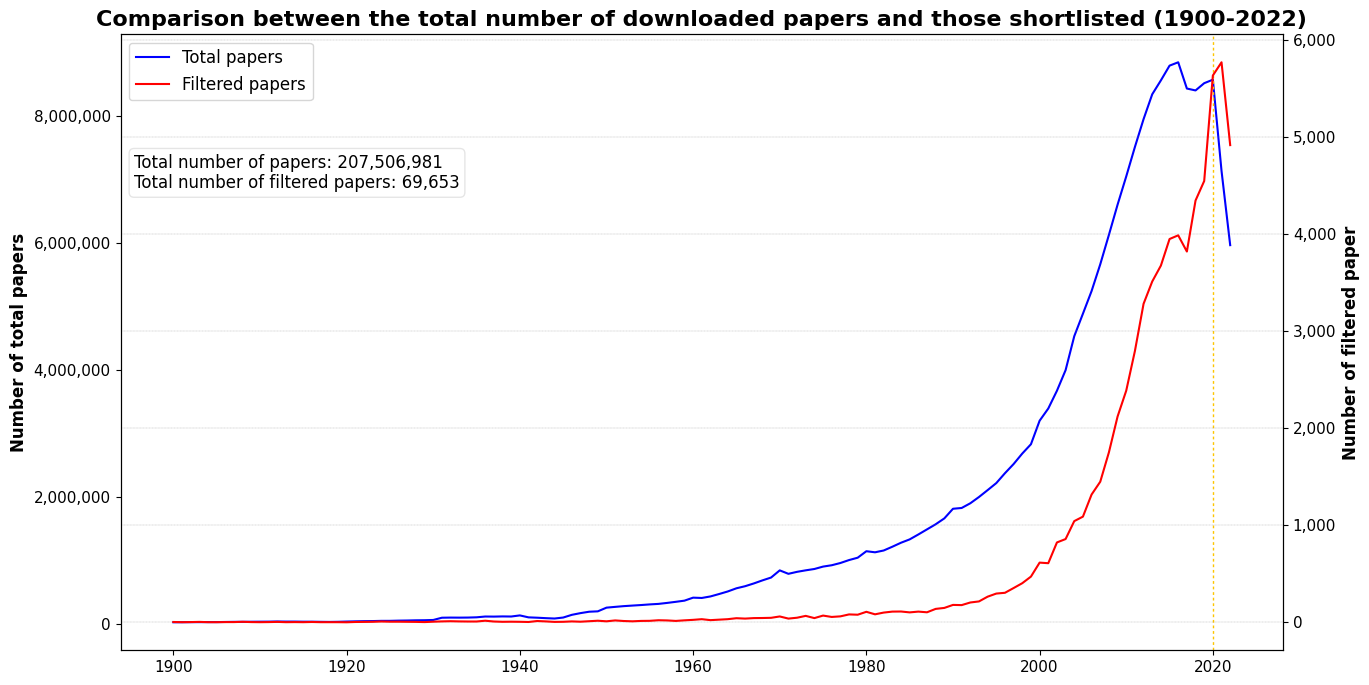

In [13]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=df_plot_year, x='year', y='counts_all_year',color='b', label='Total papers')
ax.legend_ = None
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(format_string))
ax2 = ax.twinx()
ax2 = sns.lineplot(data=df_plot_year, x='year', y='counts_research',color='r', label='Filtered papers')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(format_string))
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0, fontsize=12)
ax.axvline(x = 2020, color= '#fdc500', dashes=(2,2), linewidth=1)
ax2.grid(axis='y',color = 'grey', linestyle = '--', linewidth = 0.2)
ax.set_ylabel('Number of total papers',fontweight='bold',fontsize=12)
ax2.set_ylabel('Number of filtered paper', fontweight='bold',fontsize=12)
ax.set_xlabel(xlabel=None)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=11)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=11)
ax2.set_yticklabels(ax2.get_yticklabels(),fontsize=11)
ax.set_title('Comparison between the total number of downloaded papers and those shortlisted (1900-2022)', fontsize=16,fontweight='bold')
textstr = f'Total number of papers: {"{:,}".format(sum(df_plot_year["counts_all_year"]))}\nTotal number of filtered papers: {"{:,}".format(sum(df_plot_year["counts_research"]))}'
props = dict(boxstyle='round', facecolor='white', alpha=0.1)

ax2.text(0.0117, 0.75, textstr,  transform=ax.transAxes, fontsize=12,bbox=props)

In [14]:
print("Increase in the number of total papers between 1980 and 2000:", round((((df_plot_year[df_plot_year['year'] == 2000]['counts_all_year'].values[0] - df_plot_year[df_plot_year['year'] == 1980]['counts_all_year'].values[0]) / df_plot_year[df_plot_year['year'] == 1980]['counts_all_year'].values[0]) +1 )*100,2), "%"  )

Increase in the number of total papers between 1980 and 2000: 280.31 %


In [15]:
print("Increase in the number of total papers between 2000 and 2020:", round((((df_plot_year[df_plot_year['year'] == 2020]['counts_all_year'].values[0] - df_plot_year[df_plot_year['year'] == 2000]['counts_all_year'].values[0]) / df_plot_year[df_plot_year['year'] == 2000]['counts_all_year'].values[0]) +1 )*100,2), "%"  )

Increase in the number of total papers between 2000 and 2020: 268.08 %


In [16]:
print("Increase in the number of filtered papers between 1980 and 2000:", round((((df_plot_year[df_plot_year['year'] == 2000]['counts_research'].values[0] - df_plot_year[df_plot_year['year'] == 1980]['counts_research'].values[0]) / df_plot_year[df_plot_year['year'] == 1980]['counts_research'].values[0]) +1 )*100,2), "%"  )

Increase in the number of filtered papers between 1980 and 2000: 569.44 %


In [17]:
print("Increase in the number of filtered papers between 2000 and 2020:", round((((df_plot_year[df_plot_year['year'] == 2020]['counts_research'].values[0] - df_plot_year[df_plot_year['year'] == 2000]['counts_research'].values[0]) / df_plot_year[df_plot_year['year'] == 2000]['counts_research'].values[0]) +1 )*100,2), "%"  )

Increase in the number of filtered papers between 2000 and 2020: 916.59 %


### Representation of the number of papers published on the topic of "climate change and extreme weather events" by year, since 1950

[None, None]

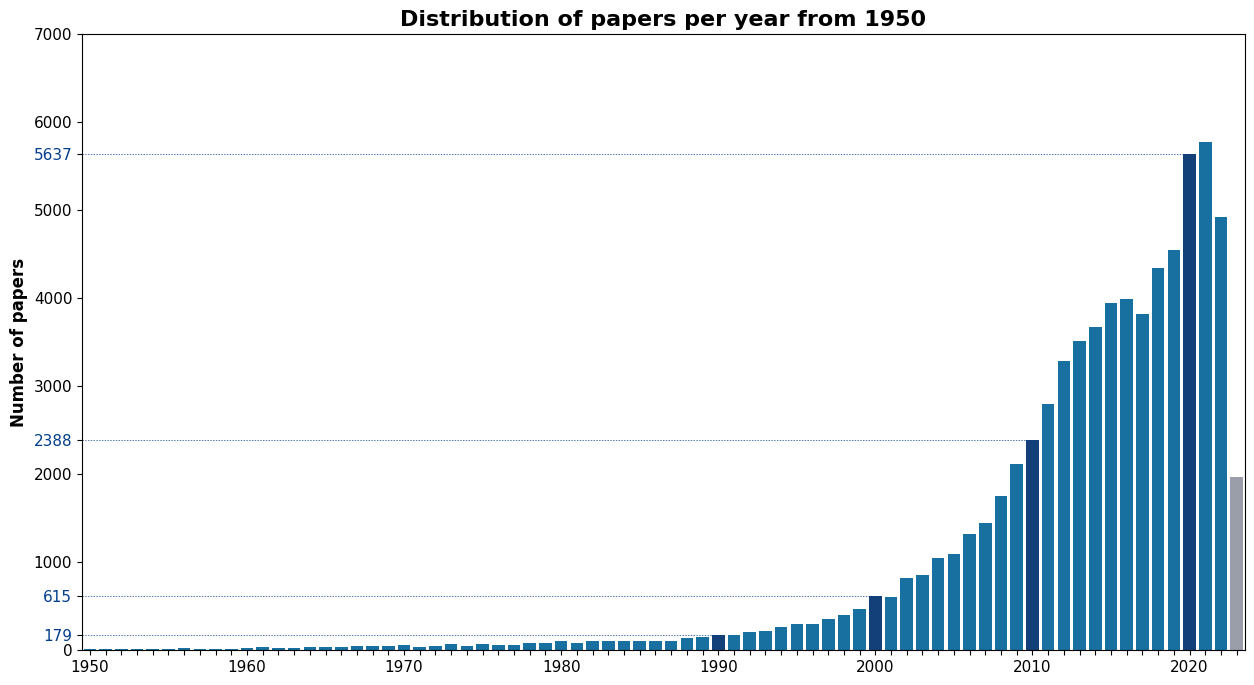

In [20]:
colours = []
for i in sorted(df[df['year']>=1950]['year'].unique()):
    if i == 1990 or i == 2000 or i == 2010 or i == 2020:
        colours.append('#023e8a')
    elif i == 2023:
        colours.append('#979dac')
    else:
        colours.append('#0077b6')

plt.figure(figsize=(15,8))
ax = sns.countplot(data=df[df['year']>=1950], x = 'year',palette= colours)
plt.title('Distribution of papers per year from 1950', fontsize=16,fontweight='bold')
plt.ylabel('Number of papers', fontweight='bold',fontsize=12)
#plt.xlabel('Year', fontweight='bold')
plt.xlabel(xlabel=None)
ax.set_xticklabels(['{:.0f}'.format(float((t.get_text()))) for t in ax.get_xticklabels()], fontsize=11)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

ax.axhline(y=len(df[df['year']==2010]['year']),xmax=0.82,color= '#023e8a', dashes=(2,2), linewidth=0.5)
ax.axhline(y=len(df[df['year']==2000]['year']),xmax=0.68,color= '#023e8a', dashes=(2,2), linewidth=0.5)
ax.axhline(y=len(df[df['year']==1990]['year']),xmax=0.55,color= '#023e8a', dashes=(2,2), linewidth=0.5)
ax.axhline(y=len(df[df['year']==2020]['year']),xmax=0.95,color= '#023e8a', dashes=(2,2), linewidth=0.5)

yt = ax.get_yticks() 
yt=np.append(yt,len(df[df['year']==2010]['year']))
yt=np.append(yt,len(df[df['year']==2000]['year']))
yt=np.append(yt,len(df[df['year']==1990]['year']))
yt=np.append(yt,len(df[df['year']==2020]['year']))
ax.set_yticks(yt)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=11)

id_tick_change_colour = 8
plt.setp(ax.get_yticklabels()[id_tick_change_colour], color='#023e8a')
id_tick_change_colour = 9
plt.setp(ax.get_yticklabels()[id_tick_change_colour], color='#023e8a')
id_tick_change_colour = 10
plt.setp(ax.get_yticklabels()[id_tick_change_colour], color='#023e8a')
id_tick_change_colour = 11
plt.setp(ax.get_yticklabels()[id_tick_change_colour], color='#023e8a')

In [21]:
print(f"The number of paper before 2010 is {len(df[df['year']<2010])}, while, the number of paper in and after 2010 is {len(df[df['year']>=2010])}")

The number of paper before 2010 is 17116, while, the number of paper in and after 2010 is 54617


In [22]:
print("The number of papers between 2018 and 2021 is increased by", round(((len(df[df['year']==2021]) - len(df[df['year']==2018]))/len(df[df['year']==2018]))*100,2), "%")

The number of papers between 2018 and 2021 is increased by 32.77 %


### Focus on 1990-2023

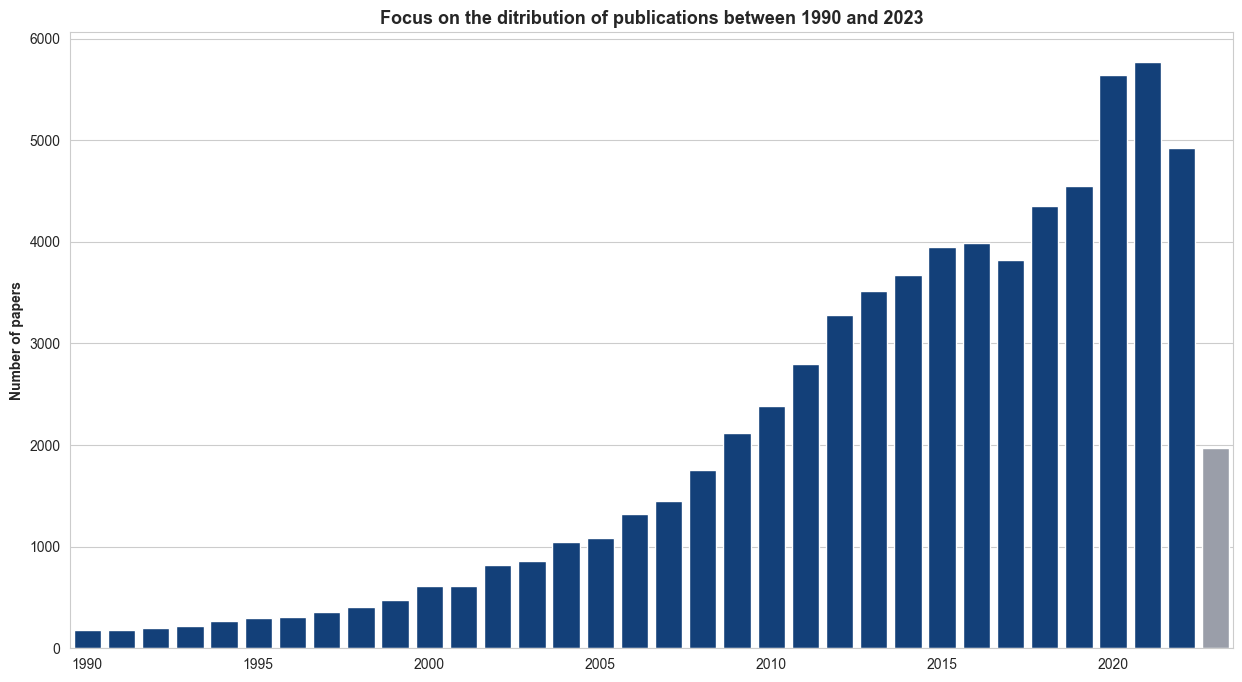

In [23]:
colours = []
for i in sorted(df[df['year']>=1990]['year'].unique()):
    if i == 2023:
        colours.append('#979dac')
    else:
        colours.append('#023e8a')
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
ax = sns.countplot(data=df[df['year']>=1990], x = 'year',palette=colours)
plt.title('Focus on the ditribution of publications between 1990 and 2023', fontsize=13,fontweight='bold')
ax.set_xticklabels(['{:.0f}'.format(float((t.get_text()))) for t in ax.get_xticklabels()])
plt.ylabel('Number of papers', fontweight='bold')
plt.xlabel(xlabel=None)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

## Categories analysis

In [24]:
#Creating a dataset to build plot about categories in which the papers fall

category = []
for i in tqdm(range(len(df))):
    cat_types = []
    if pd.isna(df['s2fieldsofstudy'][i]):
        category.append(np.NaN)
    else:
        for j in range(len(eval(df['s2fieldsofstudy'][i]))):
            cat_types.append(eval(df['s2fieldsofstudy'][i])[j]['category'])
        category.append(list(set(cat_types)))
df['category'] = category

category_plot = []
categ_iterr = df['category'].dropna()
for i in categ_iterr:
    for j in i:
        category_plot.append(j)

print('The number of unique categories found is:', len(np.unique(category_plot)))

100%|██████████| 72355/72355 [00:15<00:00, 4653.77it/s]


The number of unique categories found is: 23


The categoeies found are more than papers themselvees because a paper can fall in more than one category

In [25]:
print('Total number of categories:',len(category_plot))

Total number of categories: 107125


In [26]:
#Count the occurencies for each category and creating a dataset
keys, counts = np.unique(category_plot, return_counts=True)
df_plot_all = pd.DataFrame({'keys':keys,'counts':counts})
df_plot_all = df_plot_all.sort_values(by='counts',ascending=False)

### Plotting the appeareances per category

This section analyses how many papers are classified in a given category. Three graphs are made: 
1. The first general, taking into account all the categories that appear in the graph. 
2. The second focuses on which categories are most associated with the most common category: "Environmental Science", as papers can be categorised with more than one category. 
3. The third graph analyses which category is most often associated with "Environmental Science" and "Geography", which is the most common category pair in the classification. The third is "Geology".

The number of papers falling into the "Enivironmental Science" category is: 35727
The number of papers falling into "Environmental Science" and "Geography" category is: 10184
The number of papers falling into "Environmental Science", "Geography" and "Geology" category is: 1385


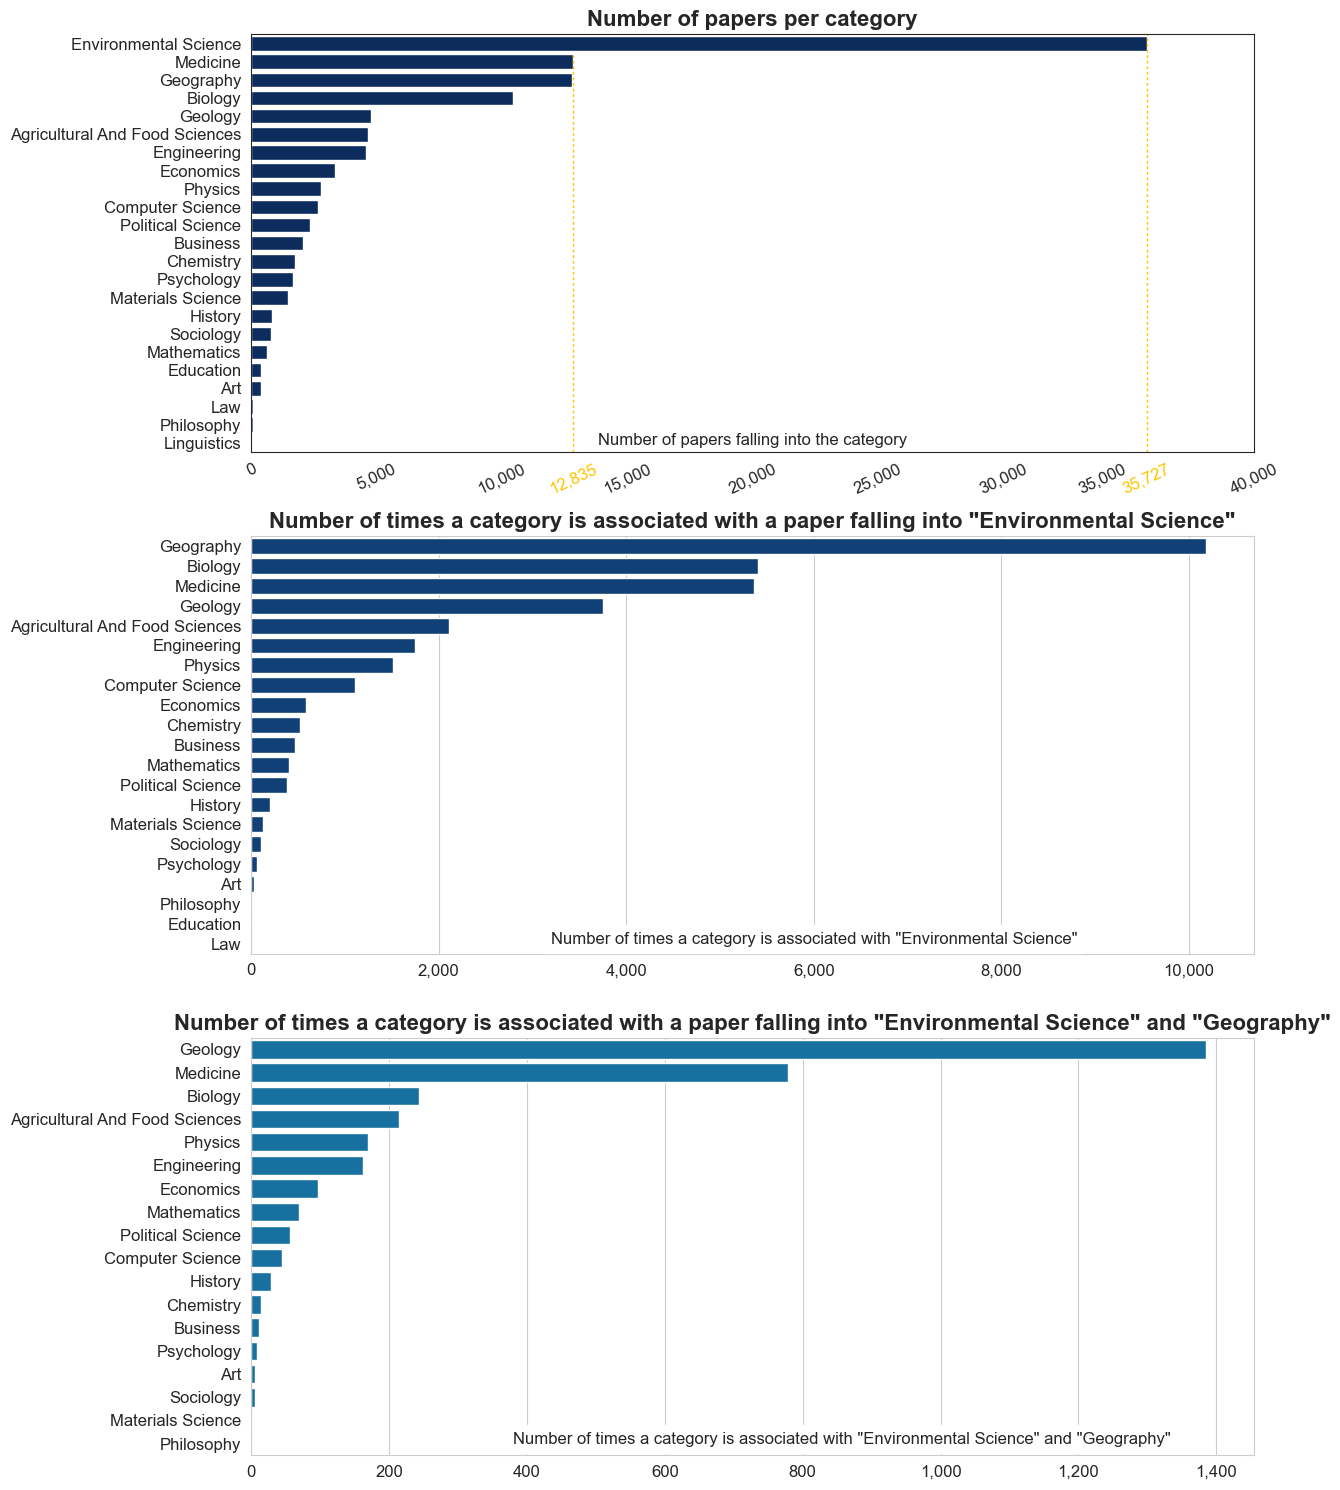

In [29]:
#creating the figure
main = plt.figure(constrained_layout=False, figsize=(13,15),layout='tight')
#creating the grid for the subplots
gs = main.add_gridspec(3,1)

sns.set_style("white")
ax1 = main.add_subplot(gs[0,0])
ax1 = sns.barplot(data = df_plot_all, y = 'keys', x = 'counts', orient = 'h', color = '#00296b')
plt.xlabel('Number of papers falling into the category', fontsize = 12)
ax1.xaxis.set_label_coords(0.5,0.045)
plt.ylabel(None)
ax1.axvline(x = df_plot_all[df_plot_all['keys']=='Environmental Science']['counts'].values[0], color= '#fdc500', dashes=(2,2), linewidth=1)
ax1.axvline(x = df_plot_all[df_plot_all['keys']=='Medicine']['counts'].values[0], color= '#fdc500', dashes=(2,2), linewidth=1,ymax=0.95)
xt = ax1.get_xticks() 
xt=np.append(xt,df_plot_all[df_plot_all['keys']=='Environmental Science']['counts'].values[0])
xt=np.append(xt,df_plot_all[df_plot_all['keys']=='Medicine']['counts'].values[0])
ax1.set_xticks(xt)
id_tick_change_colour = 9
plt.setp(ax1.get_xticklabels()[id_tick_change_colour], color='#fdc500')
id_tick_change_colour = 10
plt.setp(ax1.get_xticklabels()[id_tick_change_colour], color='#fdc500')
plt.setp(ax1.get_xticklabels()[7], ha= 'right')
for label in enumerate(ax1.get_xticklabels()):
    if label == '35,000':
        label.set_visible(False)
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_string))
plt.xticks(rotation=25)
plt.title("Number of papers per category",fontsize=16,fontweight='bold')
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=12)

#collect all the papers that fall into the "Environmental Science category"
unique_pair = []
for i in categ_iterr:
    if 'Environmental Science' in i:
        unique_pair.append(i)

print('The number of papers falling into the "Enivironmental Science" category is:', len(unique_pair))



sns.set_style("whitegrid")
ax2 = main.add_subplot(gs[1,0])
#Collect all the categories associated with "Environmental Science"
ES_associated = []
for i in unique_pair:
    for j in i:
        if j != 'Environmental Science':
            ES_associated.append(j)
#Calculate the number of occurencies for each category
keys, counts = np.unique(ES_associated, return_counts=True)
df_plot = pd.DataFrame({'keys':keys,'counts':counts})
df_plot = df_plot.sort_values(by='counts',ascending=False)
#plotting the result
ax2 = sns.barplot(data = df_plot, y = 'keys', x = 'counts', orient = 'h', color = '#003f88')
plt.ylabel(None)
plt.xlabel(None)
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_string))
plt.title('Number of times a category is associated with a paper falling into "Environmental Science"',fontsize=16,fontweight='bold')
ax2.annotate(text='Number of times a category is associated with "Environmental Science"',xy=(3200,20),backgroundcolor='white', fontsize = 12)
ax2.set_yticklabels(ax2.get_yticklabels(), fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=12)

#collect all the papers that fall into the "Environmental Science" and "Geography" categories
unique_pair = []
for i in categ_iterr:
    if 'Environmental Science' in i and 'Geography' in i:
        unique_pair.append(i)

print('The number of papers falling into "Environmental Science" and "Geography" category is:', len(unique_pair))

ax3 = main.add_subplot(gs[2,0])
#Collect all the categories associated with "Environmental Science" and "Geography"
ESG_associated = []
for i in unique_pair:
    for j in i:
        if j != 'Environmental Science' and j != 'Geography':
            ESG_associated.append(j)
#Calculate the number of occurencies for each category
keys, counts = np.unique(ESG_associated, return_counts=True)
df_plot = pd.DataFrame({'keys':keys,'counts':counts})
df_plot = df_plot.sort_values(by='counts',ascending=False)
#plotting the result
ax3 = sns.barplot(data = df_plot, y = 'keys', x = 'counts', orient = 'h', color = '#0077b7')
plt.ylabel(None)
plt.xlabel(None)
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_string))
plt.title('Number of times a category is associated with a paper falling into "Environmental Science" and "Geography"',fontsize=16,fontweight='bold')
ax3.annotate(text='Number of times a category is associated with "Environmental Science" and "Geography"',xy=(380,17),backgroundcolor='white', fontsize=12)
ax3.set_yticklabels(ax3.get_yticklabels(), fontsize=12)
ax3.set_xticklabels(ax3.get_xticklabels(), fontsize=12)

unique_pair = []
for i in categ_iterr:
    if 'Environmental Science' in i and 'Geography' in i and 'Geology' in i:
        unique_pair.append(i)

print('The number of papers falling into "Environmental Science", "Geography" and "Geology" category is:', len(unique_pair))

### Matrix representing pairings between categories

In [31]:
#Creating the dataset for the heatmap regarding association between categories

df_plot_all_sorted = df_plot_all.sort_values(by='counts')
df_plot_all_sorted = df_plot_all_sorted.reset_index(drop=True)
df_matrix = pd.DataFrame(columns = df_plot_all_sorted['keys'], index=df_plot_all_sorted['keys'])
for i in tqdm(df_matrix.columns):
    for j in df_matrix.index:
        count = 0
        for lista in df['category'].dropna():
            if i in lista and j in lista:
                count+=1
        df_matrix[i][j] = count
df_matrix.columns.name = None
df_matrix.index.name = None
df_matrix = df_matrix[df_matrix.columns].astype(float)
df_matrix

  0%|          | 0/23 [00:00<?, ?it/s]

100%|██████████| 23/23 [00:12<00:00,  1.78it/s]


,Linguistics,Philosophy,Law,Art,Education,Mathematics,Sociology,History,Materials Science,Psychology,...,Computer Science,Physics,Economics,Engineering,Agricultural And Food Sciences,Geology,Biology,Geography,Medicine,Environmental Science
Linguistics,16.0,0.0,0.0,1.0,1.0,0.0,3.0,5.0,0.0,5.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Philosophy,0.0,82.0,1.0,14.0,3.0,0.0,11.0,12.0,0.0,10.0,...,1.0,1.0,3.0,0.0,0.0,2.0,2.0,2.0,7.0,11.0
Law,0.0,1.0,95.0,1.0,3.0,0.0,15.0,5.0,0.0,3.0,...,1.0,0.0,6.0,2.0,0.0,0.0,1.0,9.0,5.0,3.0
Art,1.0,14.0,1.0,384.0,7.0,3.0,46.0,80.0,2.0,23.0,...,23.0,5.0,8.0,33.0,3.0,2.0,3.0,47.0,23.0,27.0
Education,1.0,3.0,3.0,7.0,409.0,4.0,55.0,10.0,2.0,98.0,...,19.0,6.0,6.0,30.0,1.0,1.0,2.0,37.0,77.0,10.0
Mathematics,0.0,0.0,0.0,3.0,4.0,644.0,1.0,0.0,7.0,1.0,...,120.0,54.0,23.0,76.0,44.0,26.0,17.0,75.0,43.0,406.0
Sociology,3.0,11.0,15.0,46.0,55.0,1.0,798.0,78.0,0.0,32.0,...,17.0,4.0,68.0,15.0,4.0,9.0,4.0,82.0,51.0,107.0
History,5.0,12.0,5.0,80.0,10.0,0.0,78.0,834.0,1.0,13.0,...,7.0,12.0,78.0,29.0,4.0,23.0,6.0,153.0,58.0,202.0
Materials Science,0.0,0.0,0.0,2.0,2.0,7.0,0.0,1.0,1453.0,0.0,...,35.0,224.0,4.0,434.0,19.0,32.0,41.0,2.0,182.0,130.0
Psychology,5.0,10.0,3.0,23.0,98.0,1.0,32.0,13.0,0.0,1657.0,...,38.0,11.0,20.0,28.0,1.0,4.0,269.0,51.0,923.0,59.0


[Text(0.5, 0, 'Linguistics'),
 Text(1.5, 0, 'Philosophy'),
 Text(2.5, 0, 'Law'),
 Text(3.5, 0, 'Art'),
 Text(4.5, 0, 'Education'),
 Text(5.5, 0, 'Mathematics'),
 Text(6.5, 0, 'Sociology'),
 Text(7.5, 0, 'History'),
 Text(8.5, 0, 'Materials Science'),
 Text(9.5, 0, 'Psychology'),
 Text(10.5, 0, 'Chemistry'),
 Text(11.5, 0, 'Business'),
 Text(12.5, 0, 'Political Science'),
 Text(13.5, 0, 'Computer Science'),
 Text(14.5, 0, 'Physics'),
 Text(15.5, 0, 'Economics'),
 Text(16.5, 0, 'Engineering'),
 Text(17.5, 0, 'Agricultural And Food Sciences'),
 Text(18.5, 0, 'Geology'),
 Text(19.5, 0, 'Biology'),
 Text(20.5, 0, 'Geography'),
 Text(21.5, 0, 'Medicine'),
 Text(22.5, 0, 'Environmental Science')]

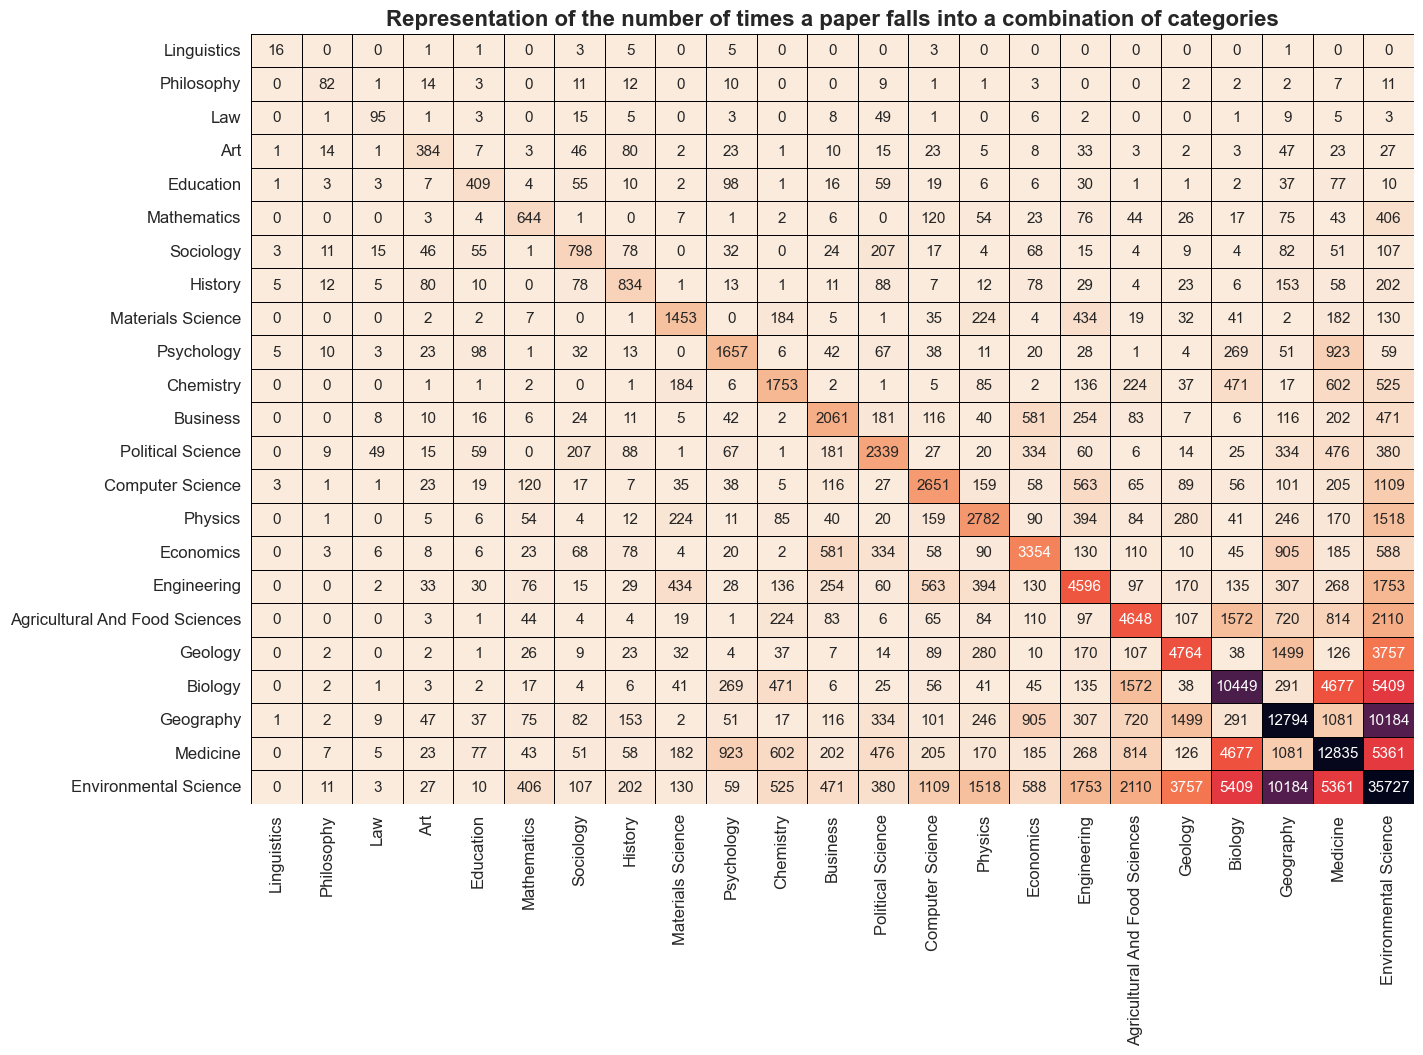

In [37]:
#plotting the matrix
plt.figure(figsize=(15,10))
ax = sns.heatmap(df_matrix, annot=True, fmt="g", vmax=13000, cbar=False, cmap='rocket_r', linewidth=0.5, linecolor='black',annot_kws={"size":11})
plt.title("Representation of the number of times a paper falls into a combination of categories",fontsize=16,fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(), fontsize = 12)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 12)

### Analysis of the presence of the most common categories over the years

In [38]:
#cration of a dataset with the number of appearances per category per year, including missing values and total

for i in np.unique(category_plot):
    globals()[i.replace(" ","_").lower()] = []
for year in tqdm(df['year'].dropna().unique()):
    for j in np.unique(category_plot):
        globals()[j.replace(" ","_").lower() + 'count'] = 0
    for category in df[df['year'] == year]['category'].dropna():
        for cat_item in category:
            globals()[cat_item.replace(" ","_").lower() + 'count'] +=1
    for k in np.unique(category_plot):
        globals()[k.replace(" ","_").lower()].append(globals()[k.replace(" ","_").lower() + 'count'])

datafr = {'year':df['year'].dropna().unique()}

for l in np.unique(category_plot):
    datafr[l+' count'] = globals()[l.replace(" ","_").lower()]

df_cat_year = pd.DataFrame(datafr)
df_cat_year = df_cat_year.sort_values(by='year')
df_cat_year.reset_index(drop=True, inplace=True)

#Calculating the number of missing values per year
dfna = df[df['category'].isna()][['year','category']]

pivot = dfna.pivot_table(index="year", 
               values=["category"], 
               aggfunc= lambda x: x.isna().sum())

df_pivot = pd.DataFrame({'year':pivot.index,'Na_count':pivot['category']})
df_pivot.index.name = None

df_cat_year = pd.merge(df_cat_year, df_pivot, on='year',how='outer')

col = list(df_cat_year.columns)
col.remove('year')

#calculating the total per year
df_cat_year['Total'] = df_cat_year[col].sum(axis=1)

df_cat_year

100%|██████████| 167/167 [00:29<00:00,  5.67it/s]


,year,Agricultural And Food Sciences count,Art count,Biology count,Business count,Chemistry count,Computer Science count,Economics count,Education count,Engineering count,...,Materials Science count,Mathematics count,Medicine count,Philosophy count,Physics count,Political Science count,Psychology count,Sociology count,Na_count,Total
0,1812.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,1.0
1,1842.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,NaN,2.0
2,1846.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2.0,2.0
3,1849.0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,NaN,2.0
4,1851.0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,2019.0,281,21,644,231,123,237,224,17,258,...,100,42,786,9,268,166,74,37,802.0,7894.0
163,2020.0,397,19,733,218,155,273,214,24,272,...,121,59,999,6,261,183,110,46,923.0,9674.0
164,2021.0,349,18,464,156,57,291,182,22,219,...,64,51,1079,1,303,107,90,19,1891.0,8972.0
165,2022.0,194,2,282,18,17,239,41,12,79,...,27,23,1186,0,193,39,54,3,3292.0,6623.0


Text(2022.3, 3020, 'Missing \n values')

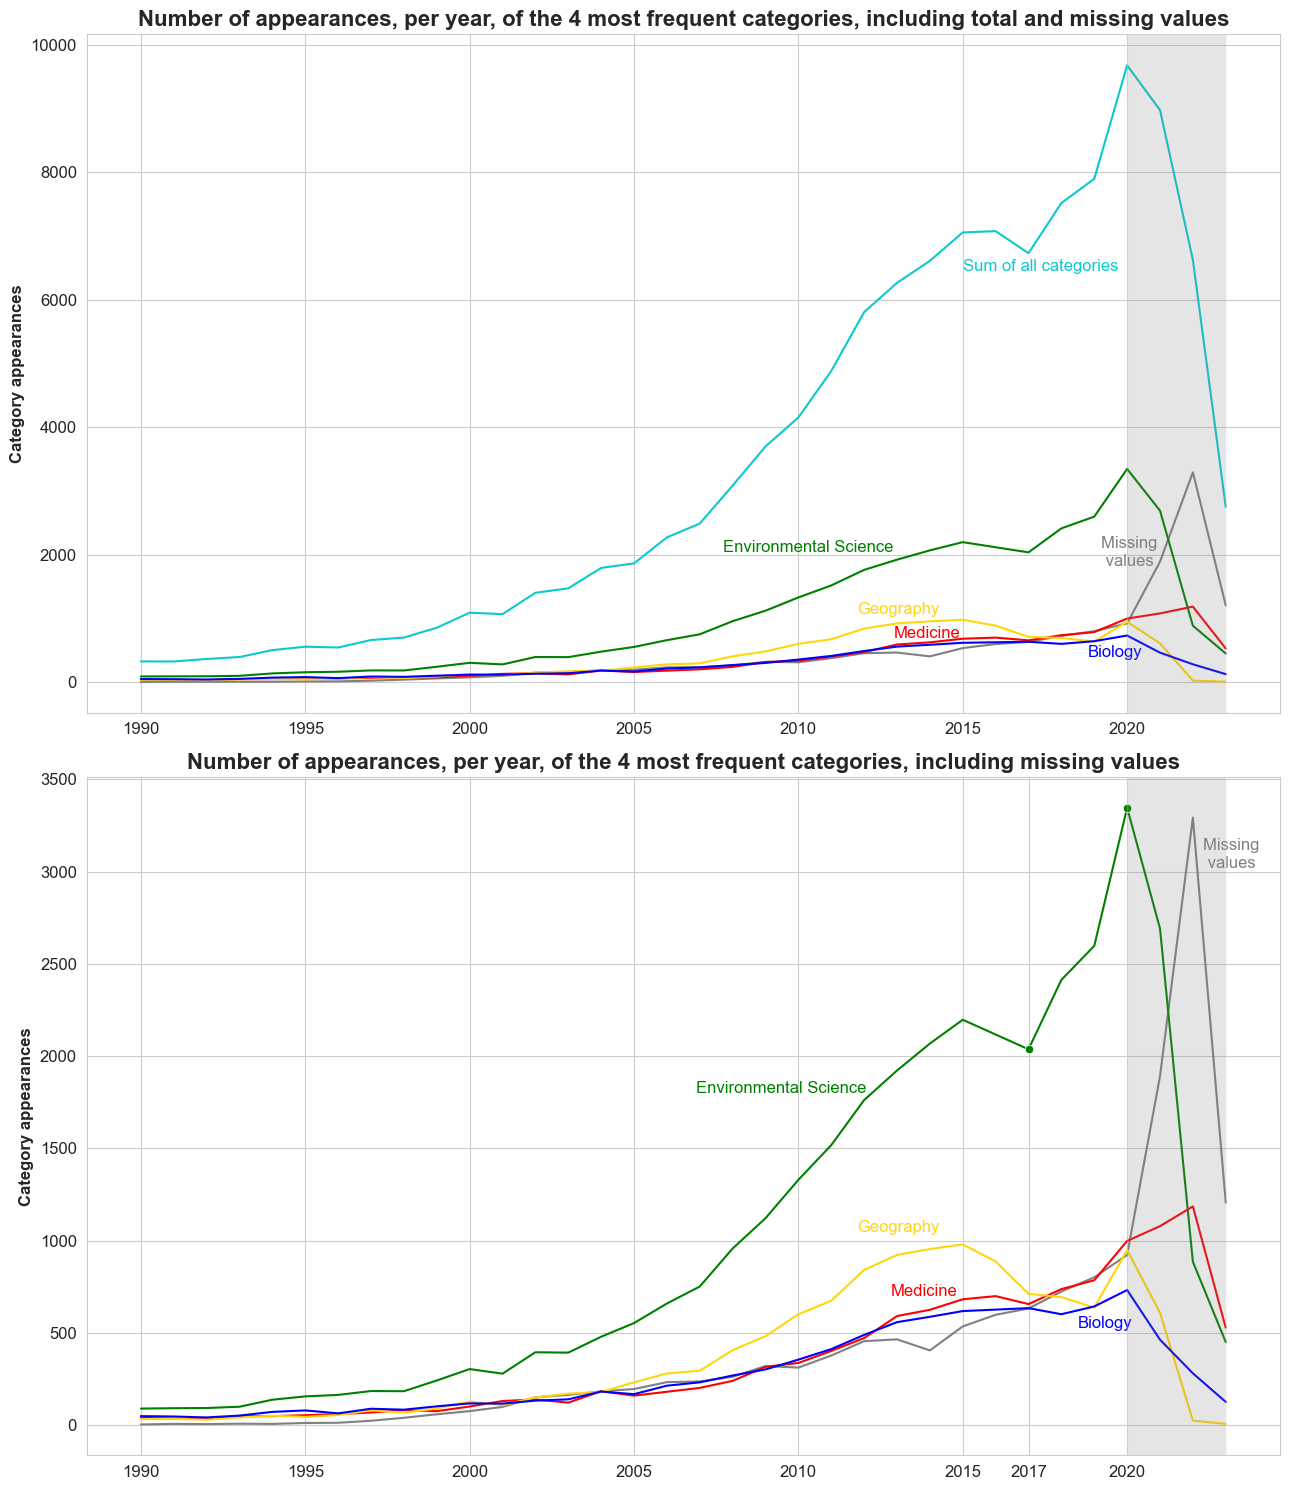

In [52]:
#plotting the result with two lineplot, one with total, the other without

main2 = plt.figure(constrained_layout=False, figsize=(13,15),layout='tight')
#creating the grid for the subplots
gs = main2.add_gridspec(2,1)
df_cat_year_plot = df_cat_year[(df_cat_year['year'] >= 1990)]

ax = main2.add_subplot(gs[0,0])

ax = sns.lineplot(data=df_cat_year_plot, x='year', y='Environmental Science count',color='g', label='Environmental Science')
ax = sns.lineplot(data=df_cat_year_plot, x='year', y='Medicine count',color='r', label='Medicine')
ax = sns.lineplot(data=df_cat_year_plot, x='year', y='Geography count',color='#ffd60a', label='Geography')
ax = sns.lineplot(data=df_cat_year_plot, x='year', y='Biology count',color='b', label='Biology')
ax = sns.lineplot(data=df_cat_year_plot, x='year', y='Na_count',color='grey', zorder=1)
ax = sns.lineplot(data=df_cat_year_plot, x='year', y='Total',color='#0bc9cd')

plt.axvspan(2020, xmax=2023, facecolor='grey', alpha=0.2,zorder=10, edgecolor=None, linewidth=None)
ax.legend().set_visible(False)
plt.xlabel(None)
plt.ylabel('Category appearances',fontweight='bold',fontsize = 12)
plt.title('Number of appearances, per year, of the 4 most frequent categories, including total and missing values', fontsize=16,fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

ax.annotate(text='Environmental Science',xy=(2007.7,2050),color='g', fontsize=12)
ax.annotate(text='Medicine',xy=(2012.9,700),color='r', fontsize=12)
ax.annotate(text='Geography',xy=(2011.8,1070),color='#ffd60a', fontsize=12)
ax.annotate(text='Biology',xy=(2018.8,400),color='b', fontsize=12)
ax.annotate(text='Missing \n values',xy=(2019.2,1830),color='grey', fontsize=12)
ax.annotate(text='Sum of all categories',xy=(2015.001,6450),color='#0bc9cd', fontsize=12)


ax1 = main2.add_subplot(gs[1,0])

ax1 = sns.lineplot(data=df_cat_year_plot, x='year', y='Environmental Science count',color='g', label='Environmental Science')
ax1 = sns.scatterplot(data=df_cat_year_plot[(df_cat_year_plot['year'] == 2017) | (df_cat_year_plot['year'] == 2020)], x='year', y='Environmental Science count', color = 'g',zorder=5)
ax1 = sns.lineplot(data=df_cat_year_plot, x='year', y='Medicine count',color='r', label='Medicine')
ax1 = sns.lineplot(data=df_cat_year_plot, x='year', y='Geography count',color='#ffd60a', label='Geography')
ax1 = sns.lineplot(data=df_cat_year_plot, x='year', y='Biology count',color='b', label='Biology')
ax1 = sns.lineplot(data=df_cat_year_plot, x='year', y='Na_count',color='grey', zorder=1)

xt = ax1.get_xticks() 
xt=np.append(xt,2017)
ax1.set_xticks(xt)
plt.axvspan(2020, xmax=2023, facecolor='grey', alpha=0.2,zorder=10, edgecolor=None, linewidth=None)
ax1.legend().set_visible(False)
plt.xlabel(None)
plt.ylabel('Category appearances',fontweight='bold', fontsize=12)
plt.title('Number of appearances, per year, of the 4 most frequent categories, including missing values', fontsize=16,fontweight='bold')
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=12)
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=12)

ax1.annotate(text='Environmental Science',xy=(2006.9,1800),color='g', fontsize=12)
ax1.annotate(text='Medicine',xy=(2012.8,700),color='r', fontsize=12)
ax1.annotate(text='Geography',xy=(2011.8,1050),color='#ffd60a', fontsize=12)
ax1.annotate(text='Biology',xy=(2018.5,530),color='b', fontsize=12)
ax1.annotate(text='Missing \n values',xy=(2022.3,3020),color='grey', fontsize=12)